In [122]:
import pandas as pd
import TumorDecon as td
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

Not entirley sure what Im supposed to do with this data

In [88]:
human_expression = pd.read_excel("../data/HS_CPM_withNames.xlsx",index_col="Gene Name")
del human_expression['log2 SNU2D3/SNU']
del human_expression['log2 SNU1F5/SNU']
del human_expression['log2 NCIBAP1/NCIEV']
del human_expression['NCIBAP1/NCIEV']
del human_expression['SNU1F5/SNU']
del human_expression['SNU2D3/SNU']
del human_expression['Ensembl ID']
human_expression.columns = ['SNU_Original_cell_line', "SNU_KO1", "SNU_KO2","NCI_BAP1_0","NCI_BAP1_-1"]
human_expression.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_0,NCI_BAP1_-1
Gene Name,,,,,
A1BG-AS1,0.117659,0.061119,0.000000,0.983894,1.856214
A2M,0.705952,1.650205,0.640537,1.665051,2.397610
A4GALT,14.942642,4.645022,1.537288,4.238311,5.645984
AAAS,49.475440,40.154990,64.886363,47.151212,48.261559
AACS,31.356016,30.070403,26.646325,36.555434,32.561084


In [138]:
mouse_espression = pd.read_excel("../data/MUS_CPM_results.xlsx",index_col="Gene Name")
del mouse_espression['Ensembl ID']
del mouse_espression['B162E10/B16']
del mouse_espression['B164F7/B16']
del mouse_espression['log2 B162E10/B16']
del mouse_espression['log2 B164F7/B16']
mouse_espression.index = mouse_espression.index.str.upper()
mouse_espression.head()

,B162E10,B164F7,B16
Gene Name,,,
0610009B22RIK,41.980013,64.710011,62.608110
0610009E02RIK,0.526725,1.370975,1.811577
0610009L18RIK,2.001556,3.290340,2.898524
0610010F05RIK,39.451732,50.246227,57.680620
0610010K14RIK,0.737416,0.411292,0.507242


In [139]:
mouse_espression = td.df_normalization(mouse_espression,"minmax")

In [142]:
combined_df = mouse_espression.merge(human_expression,on="Gene Name")
combined_df.head()

,B162E10,B164F7,B16,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_0,NCI_BAP1_-1
Gene Name,,,,,,,,
AAAS,0.008887,0.005159,0.006039,0.002200,0.002209,0.005648,0.002577,0.003396
AACS,0.004859,0.002182,0.001930,0.001394,0.001654,0.002319,0.001998,0.002292
AAGAB,0.006629,0.005764,0.005977,0.002370,0.003222,0.004120,0.006722,0.006973
AAK1,0.015772,0.007787,0.011829,0.000984,0.002139,0.003100,0.002267,0.002460
AAMDC,0.000424,0.000433,0.000405,0.000345,0.000242,0.000295,0.000298,0.000343


In [143]:
print(human_expression.shape,mouse_espression.shape,combined_df.shape)

(16443, 5) (14702, 3) (10356, 8)


## Human Analysis

In [91]:
human_expression = td.df_normalization(human_expression,"minmax")
human_expression.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_0,NCI_BAP1_-1
Gene Name,,,,,
A1BG-AS1,0.000005,0.000003,0.000000,0.000054,0.000131
A2M,0.000031,0.000091,0.000056,0.000091,0.000169
A4GALT,0.000665,0.000256,0.000134,0.000232,0.000397
AAAS,0.002200,0.002209,0.005648,0.002577,0.003396
AACS,0.001394,0.001654,0.002319,0.001998,0.002292


In [159]:
human_variance_threshold = td.variance_threshold_selector(human_expression,threshold=.002)
human_variance_threshold.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_0,NCI_BAP1_-1
Gene Name,,,,,
ACTB,0.197747,0.401092,0.720055,0.184780,0.320531
ACTG1,0.105288,0.207118,0.305864,0.127543,0.207452
ACTN4,0.046267,0.061848,0.181703,0.036293,0.060467
ANXA2,0.113176,0.138027,0.184257,0.186264,0.306619
B2M,0.062877,0.070103,0.027179,0.232167,0.309063


In [160]:
print(human_expression.shape,human_variance_threshold.shape)

(16443, 5) (41, 5)


In [94]:
print(human_variance_threshold.index)

Index(['ACTB', 'B2M', 'FLNA', 'HLA-B', 'HSP90AA1', 'ITGB1', 'KRT8', 'MT-CO1',
       'MT-RNR2', 'MYH9', 'SERPINE1', 'SPARC', 'TMSB4X'],
      dtype='object', name='Gene Name')


The gene expressions of HLA-B and B2M show up in the most variant genes which is interesting because they were in the analysis of TCGA patients.

In [95]:
immune_profiles = td.cibersort_main(human_expression,td.read_lm22_file())
immune_profiles.head()

Running CiberSort...


Patient_ID,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
SNU_Original_cell_line,0.173232,0.0,0.050609,0.00000,0.0,0.325913,0.029113,0.00000,0.000000,0.019908,...,0.124341,0.164611,0.0,0.000000,0.000000,0.052622,0.018694,0.000000,0.019460,0.000000
SNU_KO1,0.186037,0.0,0.149809,0.00000,0.0,0.461232,0.000000,0.01928,0.000000,0.000000,...,0.039993,0.000000,0.0,0.014445,0.000000,0.094957,0.008818,0.000000,0.018559,0.000000
SNU_KO2,0.200313,0.0,0.000000,0.00000,0.0,0.508813,0.000000,0.00000,0.062577,0.000000,...,0.011543,0.033907,0.0,0.000000,0.000000,0.028747,0.014110,0.000000,0.000000,0.000431
NCI_BAP1_0,0.066324,0.0,0.033884,0.05098,0.0,0.418845,0.028952,0.00000,0.008908,0.000000,...,0.014130,0.000000,0.0,0.000000,0.026721,0.028245,0.000000,0.213855,0.000000,0.008854
NCI_BAP1_-1,0.063180,0.0,0.030595,0.00000,0.0,0.517369,0.040623,0.00000,0.000000,0.000000,...,0.024788,0.000000,0.0,0.000000,0.015310,0.050137,0.000000,0.191082,0.000000,0.000000


In [96]:
immune_profiles_comb = td.combine_celltypes(immune_profiles)
immune_profiles_comb.head()

Patient_ID,Plasma cells,CD8 T cells,T cells gamma delta,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
SNU_Original_cell_line,0.050609,0.00000,0.019908,0.124341,0.019460,0.000000,0.173232,0.355026,0.021498,0.164611,0.018694,0.052622
SNU_KO1,0.149809,0.00000,0.000000,0.039993,0.018559,0.000000,0.186037,0.480512,0.006868,0.014445,0.008818,0.094957
SNU_KO2,0.000000,0.00000,0.000000,0.011543,0.000000,0.000431,0.200313,0.571390,0.139559,0.033907,0.014110,0.028747
NCI_BAP1_0,0.033884,0.05098,0.000000,0.014130,0.000000,0.008854,0.066324,0.456705,0.100301,0.000000,0.213855,0.054966
NCI_BAP1_-1,0.030595,0.00000,0.000000,0.024788,0.000000,0.000000,0.063180,0.557992,0.066916,0.000000,0.191082,0.065448


There seem to be huge differences between the SNU patients and the NCIB patients just in general. But maybe this is to be expected because theres just noise. But definitley  a question. Might help to seperate patients.

In [130]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(human_expression.T.values)
print(sum(pca.explained_variance_ratio_))

0.9389517536435628


In [131]:
transformed

array([[-0.74267331, -0.40156504],
       [-0.63354862, -0.05028086],
       [-0.03498416,  0.92465265],
       [ 0.52607124, -0.33631623],
       [ 0.88513485, -0.13649052]])

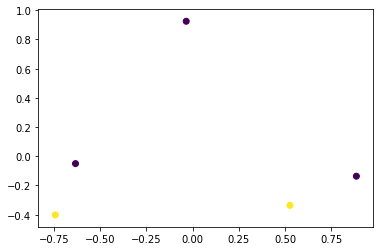

In [132]:
plt.scatter(transformed[:,0], transformed[:,1], c=[0,-1,-1,0,-1])

The split between the two studies seems to be a more significant than the BAP1 mutation removal

In [133]:
def distance(a,b):
    return np.linalg.norm(a-b)

study_distance = [distance(transformed[4],transformed[2]),distance(transformed[4],transformed[1]),distance(transformed[4],transformed[0]),distance(transformed[3],transformed[2]),distance(transformed[3],transformed[1]),distance(transformed[3],transformed[0])]
bap1_distance = [distance(transformed[0],transformed[1]),distance(transformed[0],transformed[2]),distance(transformed[0],transformed[4]),distance(transformed[3],transformed[4]),distance(transformed[3],transformed[2]),distance(transformed[3],transformed[1])]

mannwhitneyu(study_distance,bap1_distance)

MannwhitneyuResult(statistic=12.5, pvalue=0.210446410029212)

In [134]:
sum(study_distance)/len(study_distance),sum(bap1_distance)/len(bap1_distance)

(1.4033063271884487, 1.0842946267084836)

The average distance between points between studies is greater than that between BAP1 patients, what we may be seeing is some sort of study based bias probably. This kind of throws off results between studies because there are differences which are being taken into account when we assume they are identically distributes but they seem to be a bit off. 

## Mouse Analysis

In [144]:
mouse_espression_most_var = td.variance_threshold_selector(mouse_espression, threshold=.001)
print(mouse_espression.shape,mouse_espression_most_var.shape)

(14702, 3) (35, 3)


In [145]:
mouse_espression_most_var.head()

,B162E10,B164F7,B16
Gene Name,,,
ALDOA,0.219344,0.154103,0.140649
ATP1A1,0.155136,0.108688,0.063059
CALR,0.176289,0.099092,0.143706
CLTC,0.165660,0.090196,0.087576
DCT,0.629438,0.589565,0.466105


In [146]:
mouse_espression_most_var.index

Index(['ALDOA', 'ATP1A1', 'CALR', 'CLTC', 'DCT', 'DYNC1H1', 'EEF2', 'EIF3A',
       'ENO1', 'FTH1', 'FTL1', 'GPNMB', 'HGSNAT', 'HMOX1', 'HSP90AA1',
       'HSP90AB1', 'HSPA5', 'HSPA8', 'HSPD1', 'LGALS3', 'MT-CO1', 'NCL',
       'NEDD4', 'PABPC1', 'PKM', 'PMEL', 'RPL13A', 'RPL32', 'RPL5', 'SQSTM1',
       'SRXN1', 'SYT4', 'TYRP1', 'UBB', 'UBC'],
      dtype='object', name='Gene Name')

## Combined Analysis

In [166]:
print(sum([1 for i in list(mouse_espression_most_var.index) if i in list(human_variance_threshold.index)])/len(mouse_espression_most_var))

0.2


In [163]:
[i for i in list(mouse_espression_most_var.index) if i in list(human_variance_threshold.index)]

['EEF2', 'ENO1', 'HSP90AA1', 'HSP90AB1', 'MT-CO1', 'PKM', 'RPL5']

20% of the most variant 35 genes overlap which is interesting. Some of which lie along the Innate Immune System such as PKM, HSP90AB1,HSP90AB1 